# 点运算：线性+非线性+分段线性

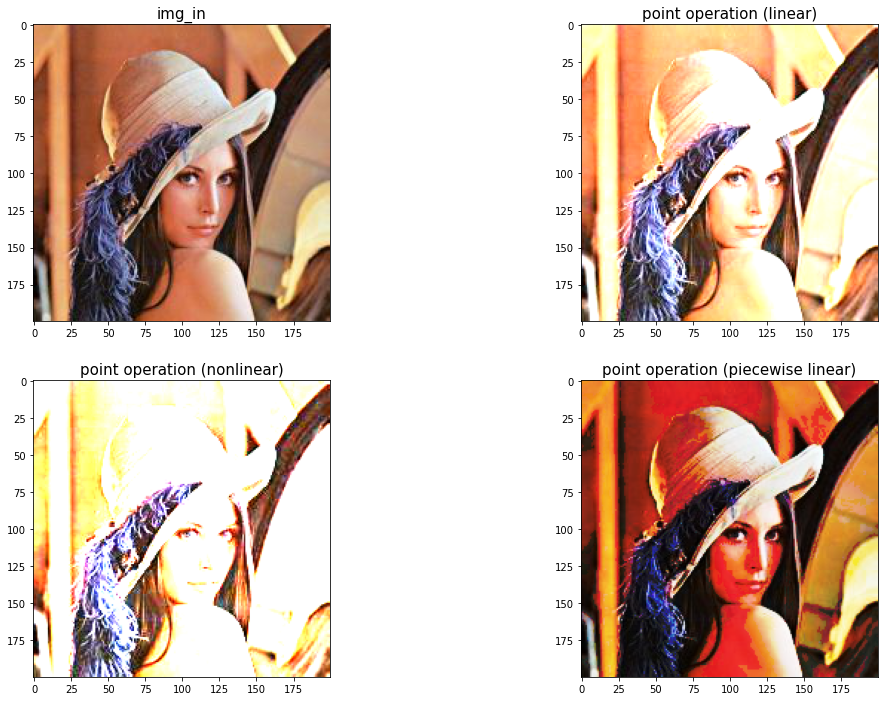

In [33]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
def clip_(result):
    result[result > 255] = 255
    result[result < 0] = 0
    return np.array(result, dtype=np.uint8)
def linear(a, b, x):
    result = a * x + b
    return clip_(result)

# ppt 3.1.2
def piece_wise_linear(Mf, Mg, a, b, c, d, x):
    x[(b <= x) & (x <= Mf)] = (Mg - d)/(Mf - b) * (x[(b <= x) & (x <= Mf)] - b) + d
    x[(a <= x) & (x <= b)] = (d - c)/(b - a) * (x[(a <= x) & (x <= b)] - a) + c
    x[(0 <= x) & (x <= a)] = c / a * x[(0 <= x) & (x <= a)]
    return clip_(x)

def nonlinear(c, gamma, x):
    # return np.log(1 + x) * c
    return clip_(c * x ** gamma)

image = np.array(Image.open('img/lena.jpg'))
fig = plt.figure(figsize=(18, 12))
plt.subplot(221)
plt.title('img_in', fontsize=15)
plt.imshow(image)
plt.subplot(222)
plt.title('point operation (linear)', fontsize=15)
plt.imshow(linear(255/130, 0, image))
plt.subplot(223)
plt.title('point operation (nonlinear)', fontsize=15)
plt.imshow(nonlinear(1, 1.3, image))
plt.subplot(224)
plt.title('point operation (piecewise linear)', fontsize=15)
plt.imshow(piece_wise_linear(255, 255, 100, 200, 50, 230, image))
plt.show()